In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df = pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

Spam


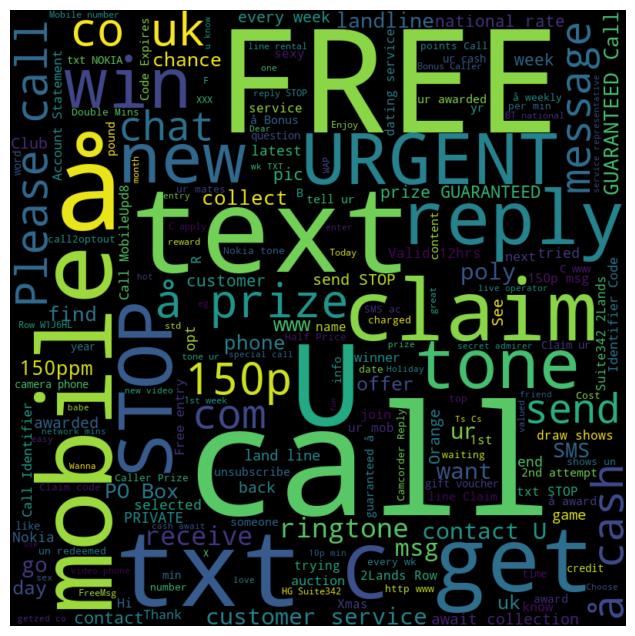

Ham


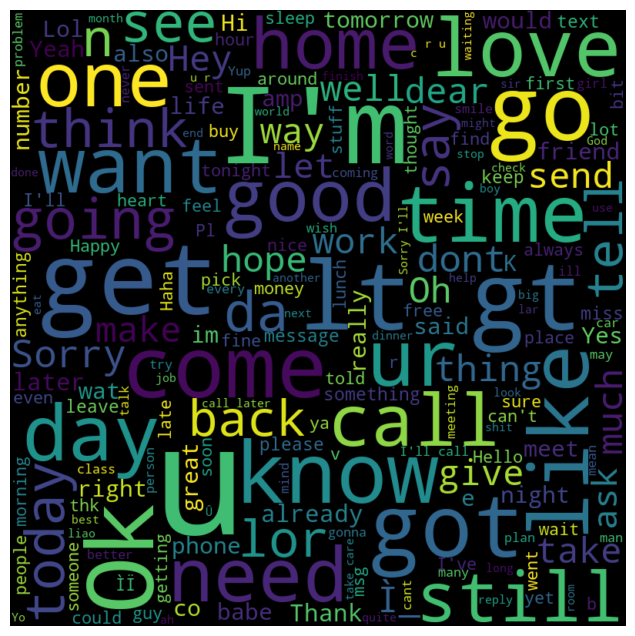

In [14]:
stop_words = set(stopwords.words('english'))

word_cloud = WordCloud(width = 800, height = 800, max_words = 200, stopwords = stop_words, background_color = 'black', max_font_size = 200)
spam = df.query("v1 == 'spam'").v2.str.cat(sep = ' ')
ham = df.query("v1 == 'ham'").v2.str.cat(sep = ' ')


print('Spam')
word_cloud.generate(spam)
plt.figure(figsize=(16, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

print('Ham')
word_cloud.generate(ham)
plt.figure(figsize=(16, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [17]:
df['v1'] = le.fit_transform(df['v1'])

In [19]:
df.head() #spam is 1 and ham is 0

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
import re
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [21]:
def preprocessing(content):
    content = content.lower()
    tokens = nltk.word_tokenize(content)
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    final = ' '.join(tokens)
    return final

In [24]:
df.v2 = [preprocessing(content) for content in df.v2]
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,go jurong point crazi avail bugi n great world...,NaN,NaN,NaN
1,0,ok lar joke wif u oni,NaN,NaN,NaN
2,1,free entri 2 wkli comp win fa cup final tkt 21...,NaN,NaN,NaN
3,0,u dun say earli hor u c alreadi say,NaN,NaN,NaN
4,0,nah think goe usf live around though,NaN,NaN,NaN


In [27]:
from tensorflow.keras.layers import LSTM, Embedding, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['v2'])

X = tokenizer.texts_to_sequences(df['v2'])
X = pad_sequences(X, maxlen=100)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, df['v1'], test_size=0.2, random_state=42)

In [31]:
i = Input(shape=(100,))
x = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=100)(i)
x = LSTM(64)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


112/112 [==============================] - 7s 37ms/step - loss: 0.2522 - accuracy: 0.9130 - val_loss: 0.0930 - val_accuracy: 0.9776
Epoch 2/50
112/112 [==============================] - 3s 31ms/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.0687 - val_accuracy: 0.9776
Epoch 3/50
112/112 [==============================] - 3s 29ms/step - loss: 0.0133 - accuracy: 0.9964 - val_loss: 0.0855 - val_accuracy: 0.9776
Epoch 4/50
112/112 [==============================] - 3s 30ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0996 - val_accuracy: 0.9742
Epoch 5/50
112/112 [==============================] - 3s 30ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.1004 - val_accuracy: 0.9742
Epoch 6/50
112/112 [==============================] - 3s 29ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1117 - val_accuracy: 0.9753
Epoch 7/50
112/112 [==============================] - 3s 29ms/step - loss: 5.5390e-04 - accuracy: 1.0000 - val_loss: 0.1219 - val_accuracy: 

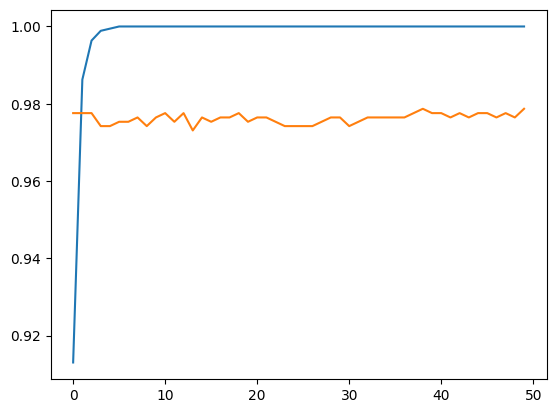

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [35]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

35/35 [==============================] - 0s 9ms/step - loss: 0.2262 - accuracy: 0.9731
Test Loss: 0.2261582911014557, Test Accuracy: 0.9730941653251648
